#EDA-1

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [3]:
df_bike = pd.read_csv("BIKE DETAILS.csv")
df_bike.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


**1. What is the range of selling prices in the dataset?**

In [4]:
min_price = df_bike['selling_price'].min()
max_price = df_bike['selling_price'].max()
price_range = max_price - min_price

min_price, max_price, price_range

(5000, 760000, 755000)

**2. What is the median selling price for bikes in the dataset?**

In [5]:
median_price = df_bike['selling_price'].median()
median_price

45000.0

**3. What is the most common seller type?**

In [6]:
seller_counts = df_bike['seller_type'].value_counts()
most_common_seller = seller_counts.idxmax()
seller_counts

,count
seller_type,
Individual,1055
Dealer,6


**4. How many bikes have driven more than 50,000 kilometers?**

In [7]:
count_over_50k = (df_bike['km_driven'] > 50000).sum()
count_over_50k

np.int64(170)

**5. What is the average km_driven value for each ownership type?**

In [8]:
avg_km_by_owner = df_bike.groupby('owner')['km_driven'].mean().round(2)
avg_km_by_owner

,km_driven
owner,
1st owner,32816.58
2nd owner,39288.99
3rd owner,33292.18
4th owner,311500.00


**6.  What proportion of bikes are from the year 2015 or older?**

In [9]:
total_bikes = len(df_bike)
bikes_2015_or_older = (df_bike['year'] <= 2015).sum()
proportion = bikes_2015_or_older / total_bikes

total_bikes, bikes_2015_or_older, proportion

(1061, np.int64(601), np.float64(0.5664467483506126))

**7. What is the trend of missing values across the dataset?**

In [10]:
missing_counts = df_bike.isna().sum()
missing_percentage = (missing_counts / len(df_bike) * 100).round(2)

missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percentage
})
missing_summary

,missing_count,missing_percent
name,0,0.0
selling_price,0,0.0
year,0,0.0
seller_type,0,0.0
owner,0,0.0
km_driven,0,0.0
ex_showroom_price,435,41.0


**8. What is the highest ex_showroom_price recorded, and for which bike?**

In [11]:
idx_max = df_bike['ex_showroom_price'].idxmax()
row = df_bike.loc[idx_max, ['name', 'ex_showroom_price', 'year']]
row

,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0
year,2013


**9. What is the total number of bikes listed by each seller type?**

In [12]:
seller_counts = df_bike['seller_type'].value_counts()
seller_counts

,count
seller_type,
Individual,1055
Dealer,6


**10.  What is the relationship between selling_price and km_driven for first-owner bikes?**

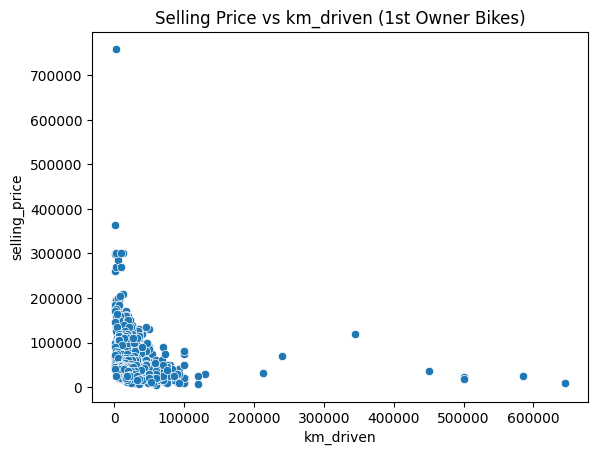

,km_driven,selling_price
km_driven,1.000000,-0.243482
selling_price,-0.243482,1.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

first_owner = df_bike[df_bike['owner'].str.contains('1st', case=False, na=False)]

sns.scatterplot(data=first_owner, x='km_driven', y='selling_price')
plt.title('Selling Price vs km_driven (1st Owner Bikes)')
plt.show()

first_owner[['km_driven', 'selling_price']].corr()

**11. Identify and remove outliers in the km_driven column using the IQR method.**

In [14]:
Q1 = df_bike['km_driven'].quantile(0.25)
Q3 = df_bike['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df_bike[(df_bike['km_driven'] < lower_bound) | (df_bike['km_driven'] > upper_bound)]
outlier_count = len(outliers)


df_bike_no_out = df_bike[(df_bike['km_driven'] >= lower_bound) & (df_bike['km_driven'] <= upper_bound)]
len(df_bike), outlier_count, len(df_bike_no_out)

(1061, 39, 1022)

**12. Perform a bivariate analysis to visualize the relationship between year and selling_price.**

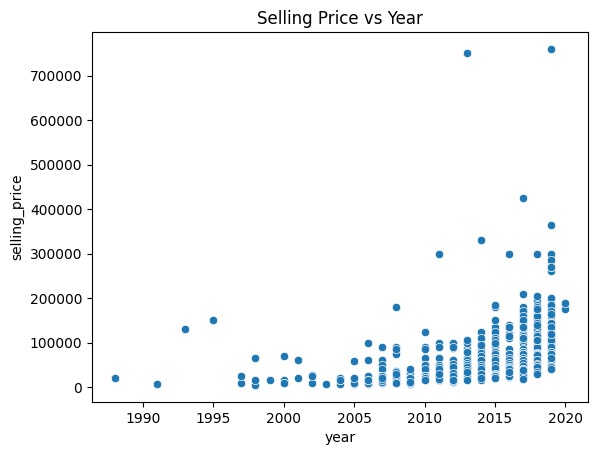

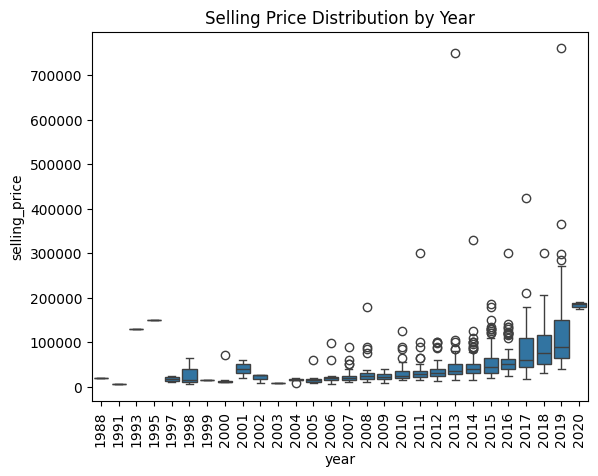

In [15]:
sns.scatterplot(data=df_bike, x='year', y='selling_price')
plt.title('Selling Price vs Year')
plt.show()

sns.boxplot(data=df_bike, x='year', y='selling_price')
plt.xticks(rotation=90)
plt.title('Selling Price Distribution by Year')
plt.show()

**13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?**

In [16]:
current_year = 2025
df_bike['age'] = current_year - df_bike['year']

df_bike['depreciation'] = df_bike['ex_showroom_price'] - df_bike['selling_price']

avg_dep_by_age = df_bike.groupby('age')['depreciation'].mean().round(2)
avg_dep_by_age

,depreciation
age,
5,-34260.00
6,2954.56
7,13023.19
8,22306.08
9,28328.19
10,28013.28
11,34505.61
12,43086.89
13,37317.65


**14. Which bike names are priced significantly above the average price for their manufacturing year?**

In [17]:
year_avg = df_bike.groupby('year')['selling_price'].mean().rename('year_avg')
df_bike = df_bike.join(year_avg, on='year')

threshold = 1.3
high_priced = df_bike[df_bike['selling_price'] > threshold * df_bike['year_avg']]

high_priced[['name', 'year', 'selling_price', 'year_avg']].head(20)

,name,year,selling_price,year_avg
0,Royal Enfield Classic 350,2019,175000,119689.511628
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
18,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
19,Yamaha FZ25,2018,120000,87660.374046
23,Jawa Standard,2019,180000,119689.511628
24,Royal Enfield Thunderbird 350,2016,110000,58469.018692
37,Honda CBR-250R,2016,120000,58469.018692
39,Royal Enfield Thunderbird 350,2015,90000,56500.000000


**15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

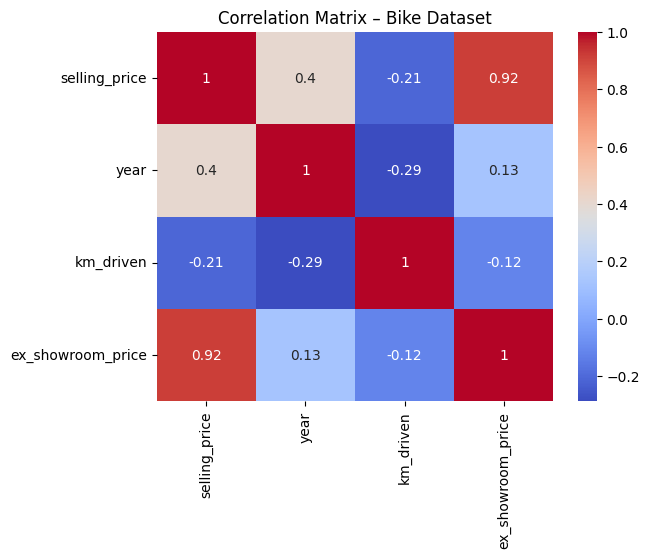

In [18]:
numeric_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
corr = df_bike[numeric_cols].corr()

corr
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix – Bike Dataset')
plt.show()

#EDA-2

In [19]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving Car Sale.csv to Car Sale.csv


In [20]:
df_car = pd.read_csv("Car Sale.csv")
df_car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


**1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?**

In [21]:
avg_price_by_dealer = df_car.groupby('Dealer_Name')['Price ($)'].mean().round(2)
avg_price_by_dealer.sort_values(ascending=False)

,Price ($)
Dealer_Name,
U-Haul CO,28769.92
Classic Chevy,28602.01
Rabun Used Car Sales,28527.54
Iceberg Rentals,28522.96
Enterprise Rent A Car,28312.58
Scrivener Performance Engineering,28297.37
Gartner Buick Hyundai Saab,28247.62
Saab-Belle Dodge,28190.14
Capitol KIA,28189.70


**2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?**

In [22]:
price_var_by_brand = df_car.groupby('Company')['Price ($)'].std().dropna().round(2)
price_var_by_brand.sort_values(ascending=False).head(10)

,Price ($)
Company,
Lincoln,19658.05
Saab,19653.74
Cadillac,19517.12
Plymouth,19066.00
Lexus,17852.92
Buick,17142.23
Mercury,16445.17
Nissan,16214.26
Saturn,15990.22


**3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?**

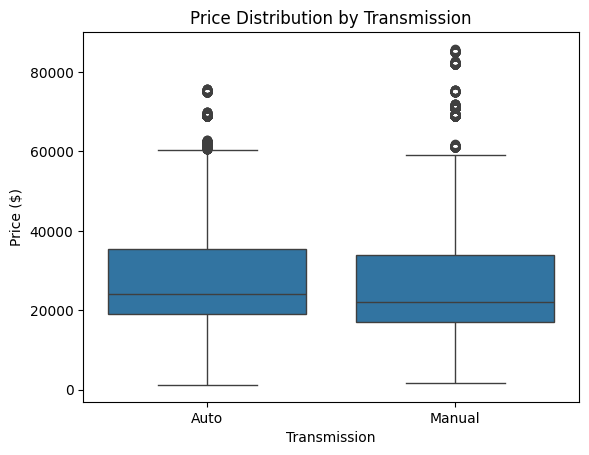

,25%,50%,75%
Transmission,,,
Auto,19000.0,24000.0,35500.0
Manual,17000.0,22001.0,34000.0


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_car, x='Transmission', y='Price ($)')
plt.title('Price Distribution by Transmission')
plt.show()

df_car.groupby('Transmission')['Price ($)'].describe()[['25%', '50%', '75%']]

**4. What is the distribution of car prices across different regions?**

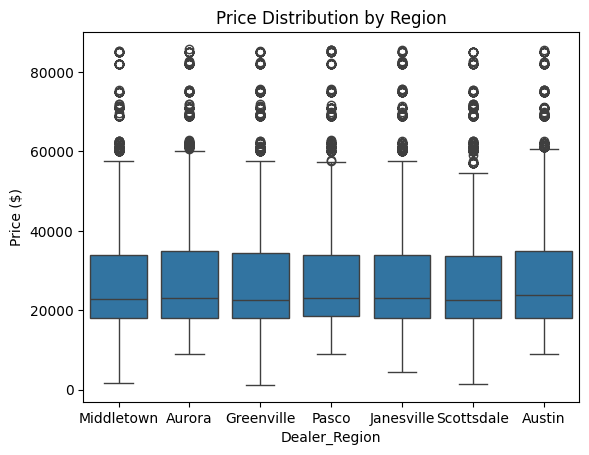

In [24]:
sns.boxplot(data=df_car, x='Dealer_Region', y='Price ($)')
plt.title('Price Distribution by Region')
plt.show()

**5. What is the distribution of cars based on body styles?**

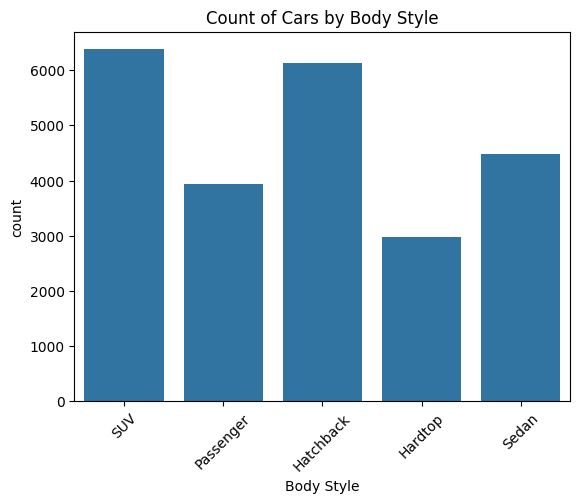

In [25]:
body_counts = df_car['Body Style'].value_counts()
body_counts
sns.countplot(data=df_car, x='Body Style')
plt.xticks(rotation=45)
plt.title('Count of Cars by Body Style')
plt.show()

**6. How does the average selling price of cars vary by customer gender and annual income?**

In [26]:
bins = [0, 30000, 60000, 100000, df_car['Annual Income'].max()]
labels = ['Low', 'Middle', 'Upper-Middle', 'High']

df_car['Income_Bracket'] = pd.cut(df_car['Annual Income'], bins=bins, labels=labels, include_lowest=True)

avg_price_gender_income = df_car.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().round(2)
avg_price_gender_income

/tmp/ipython-input-1422035067.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_gender_income = df_car.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().round(2)


Gender  Income_Bracket
Female  Low               28132.04
        Middle                 NaN
        Upper-Middle           NaN
        High              28318.80
Male    Low               27816.30
        Middle                 NaN
        Upper-Middle      43000.00
        High              28101.41
Name: Price ($), dtype: float64

**7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?**

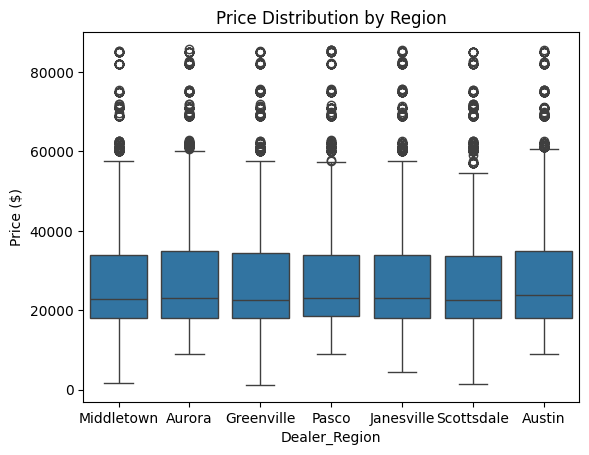

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Greenville,3128
Middletown,3128


In [27]:
sns.boxplot(data=df_car, x='Dealer_Region', y='Price ($)')
plt.title('Price Distribution by Region')
plt.show()

region_counts = df_car['Dealer_Region'].value_counts()
region_counts

**8.  How does the average car price differ between cars with different engine sizes?**

In [28]:
avg_price_engine = df_car.groupby('Engine')['Price ($)'].mean().round(2)
avg_price_engine.sort_values(ascending=False)

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.53
Overhead Camshaft,27914.71


**9. How do car prices vary based on the customer’s annual income bracket?**

/tmp/ipython-input-979775493.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df_car.groupby('Income_Bracket')['Price ($)'].mean().round(2)


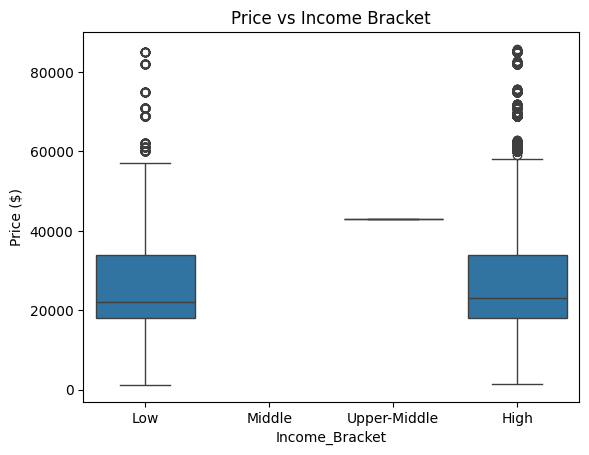

In [29]:
avg_price_by_income = df_car.groupby('Income_Bracket')['Price ($)'].mean().round(2)
avg_price_by_income

sns.boxplot(data=df_car, x='Income_Bracket', y='Price ($)')
plt.title('Price vs Income Bracket')
plt.show()

**10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?**

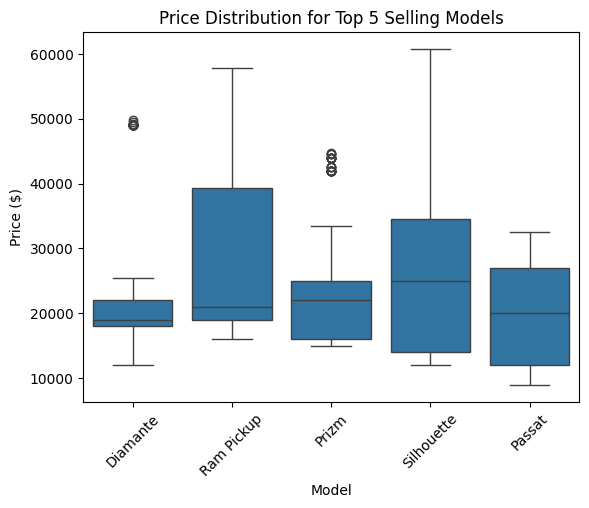

In [30]:
top5_models = df_car['Model'].value_counts().head(5).index
top5_df = df_car[df_car['Model'].isin(top5_models)]

top5_counts = top5_df['Model'].value_counts()
top5_counts

sns.boxplot(data=top5_df, x='Model', y='Price ($)')
plt.xticks(rotation=45)
plt.title('Price Distribution for Top 5 Selling Models')
plt.show()

**11.  How does car price vary with engine size across different car colors, and which colors have the highest price
variation?**

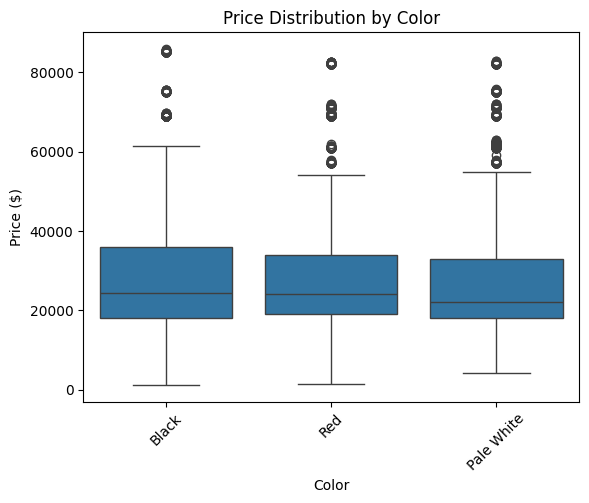

,Price ($)
Color,
Red,15519.36
Black,15286.07
Pale White,14077.35


In [31]:
sns.boxplot(data=df_car, x='Color', y='Price ($)')
plt.xticks(rotation=45)
plt.title('Price Distribution by Color')
plt.show()

price_var_color = df_car.groupby('Color')['Price ($)'].std().dropna().round(2)
price_var_color.sort_values(ascending=False).head(10)

**12. Is there any seasonal trend in car sales based on the date of sale?**

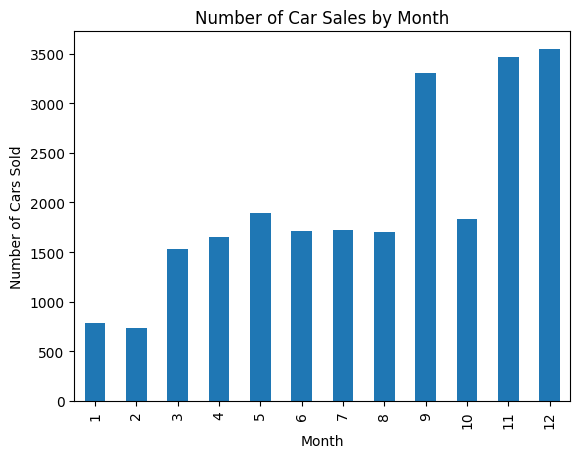

In [32]:
df_car['Date'] = pd.to_datetime(df_car['Date'])

df_car['Year'] = df_car['Date'].dt.year
df_car['Month'] = df_car['Date'].dt.month

monthly_counts = df_car.groupby('Month')['Car_id'].count()
monthly_counts

monthly_counts.plot(kind='bar')
plt.title('Number of Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()

**13. How does the car price distribution change when considering different combinations of body style and
transmission type?**

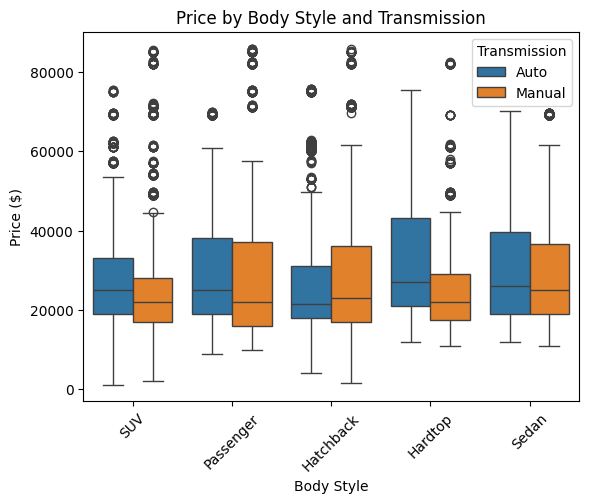

In [33]:
sns.boxplot(data=df_car, x='Body Style', y='Price ($)', hue='Transmission')
plt.xticks(rotation=45)
plt.title('Price by Body Style and Transmission')
plt.legend(title='Transmission')
plt.show()

**14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?**

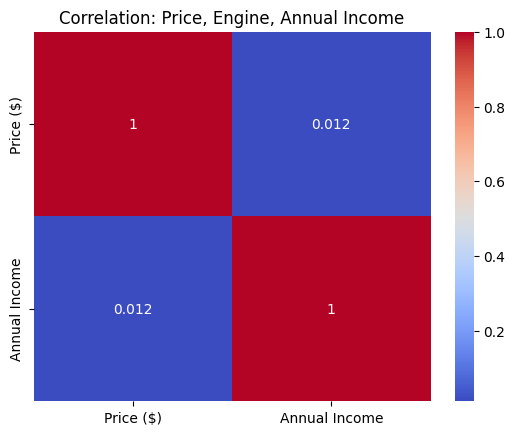

In [34]:
corr_features = df_car[['Price ($)', 'Annual Income']]
corr = corr_features.corr()
corr
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation: Price, Engine, Annual Income')
plt.show()

**15. How does the average car price vary across different car models and engine types?**

In [35]:
avg_price_model_engine = df_car.groupby(['Model', 'Engine'])['Price ($)'].mean().round(2).reset_index()

avg_price_model_engine.sort_values('Price ($)', ascending=False).head(20)

,Model,Engine,Price ($)
212,SC,Overhead Camshaft,61074.82
198,Ranger,DoubleÂ Overhead Camshaft,61064.06
222,Sable,Overhead Camshaft,61039.77
56,Catera,DoubleÂ Overhead Camshaft,56836.93
143,LX470,Overhead Camshaft,54037.49
139,LS400,Overhead Camshaft,53157.94
111,GS400,Overhead Camshaft,53086.00
239,Tacoma,DoubleÂ Overhead Camshaft,53085.82
25,Aurora,Overhead Camshaft,51833.56
173,Park Avenue,DoubleÂ Overhead Camshaft,49387.75


#EDA-3

In [36]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving amazon.csv to amazon.csv


In [37]:
df_amz = pd.read_csv("amazon.csv")
df_amz.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


**1. What is the average rating for each product category?**

In [39]:
df_amz['rating'] = pd.to_numeric(df_amz['rating'], errors='coerce')
avg_rating = df_amz.groupby('category')['rating'].mean().round(2)
avg_rating

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.80
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.15
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.60
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.05
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.25
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.15
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.30


**2. What are the top rating_count products by category?**

In [40]:
top_by_rating_count = df_amz.sort_values('rating_count', ascending=False).groupby('category').head(1)
top_by_rating_count[['category','product_name','rating_count']]

,category,product_name,rating_count
1279,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Eureka Forbes car Vac 100 Watts Powerful Sucti...,992
750,Electronics|GeneralPurposeBatteries&BatteryCha...,Eveready Red 1012 AAA Batteries - Pack of 10,989
977,"Electronics|Headphones,Earbuds&Accessories|Hea...",Sennheiser CX 80S in-Ear Wired Headphones with...,"98,250"
1059,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976
151,Computers&Accessories|Accessories&Peripherals|...,Zoul USB Type C Fast Charging 3A Nylon Braided...,974
...,...,...,...
895,Home&Kitchen|CraftMaterials|DrawingMaterials|D...,Classmate Octane Colour Burst-Multicolour Gel ...,"10,718"
941,"Computers&Accessories|Printers,Inks&Accessorie...","RC PRINT GI 790 Ink Refill for Canon G1000, G1...","1,367"
526,Electronics|Mobiles&Accessories|MobileAccessor...,WeCool B1 Mobile Holder for Bikes or Bike Mobi...,"1,193"
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118"


**3. What is the distribution of discounted prices vs. actual prices?**

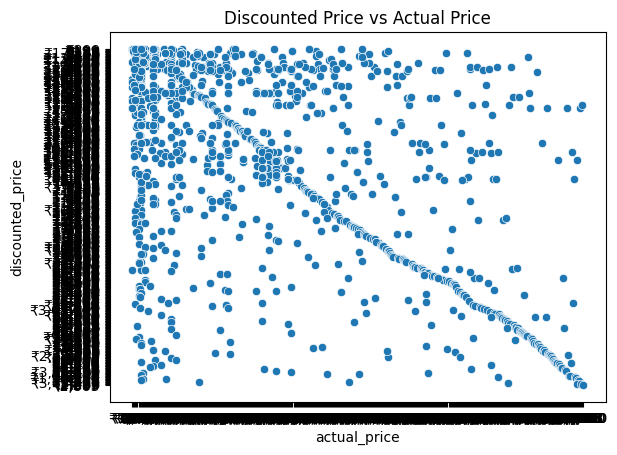

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_amz, x='actual_price', y='discounted_price')
plt.title("Discounted Price vs Actual Price")
plt.show()

**4. How does the average discount percentage vary across categories?**

In [43]:
df_amz['discount_percentage'] = df_amz['discount_percentage'].str.replace('%', '', regex=False)
df_amz['discount_percentage'] = pd.to_numeric(df_amz['discount_percentage'], errors='coerce')
avg_disc = df_amz.groupby('category')['discount_percentage'].mean().round(2)
avg_disc

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,46.5
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",0.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",5.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",17.5


**5. What are the most popular product names?**

In [44]:
popular_products = df_amz.sort_values('rating_count', ascending=False).head(10)
popular_products[['product_name','rating_count']]

,product_name,rating_count
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,992
750,Eveready Red 1012 AAA Batteries - Pack of 10,989
977,Sennheiser CX 80S in-Ear Wired Headphones with...,"98,250"
1059,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976
151,Zoul USB Type C Fast Charging 3A Nylon Braided...,974
32,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974
823,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974
536,boAt Rockerz 400 Bluetooth On Ear Headphones W...,"97,175"
918,boAt Rockerz 400 Bluetooth On Ear Headphones W...,"97,174"
1165,Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...,97


**6. What are the most popular product keywords?**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=20)
keywords = cv.fit_transform(df_amz['about_product'].astype(str))

cv.get_feature_names_out()

array(['10', 'cable', 'charge', 'charging', 'compatible', 'design',
       'devices', 'display', 'easy', 'fast', 'free', 'high', 'power',
       'product', 'speed', 'type', 'usb', 'use', 'warranty', 'water'],
      dtype=object)

**7. What are the most popular product reviews?**

In [46]:
top_reviews = df_amz.sort_values('rating_count', ascending=False).head(5)
top_reviews[['review_title','review_content']]

,review_title,review_content
1279,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though..."
750,"Nice .,very good batteries received,Longtevity...","Nive,very good batteries received,Like,Good pr..."
977,A Quality Sound-Signature but leaves craving f...,For those looking for a genuine review & a bri...
1059,"Kettle is good but bottle is not good quality,...","Bottle quality is not good.,Best for hot water..."
151,"Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...


**8. What is the correlation between discounted_price and rating?**

In [48]:
df_amz['discounted_price'] = df_amz['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df_amz['discounted_price'] = pd.to_numeric(df_amz['discounted_price'], errors='coerce')

df_amz[['discounted_price','rating']].corr()

,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


**9. What are the Top 5 categories based on the highest ratings?**

In [49]:
top_cat = avg_rating.sort_values(ascending=False).head(5)
top_cat

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


**10. Identify any potential areas for improvement or optimization based on the data analysis.**

**Answers:-->>**


*a)Categories with low average rating.*

*b)Products with high price but low rating.*

*c)Categories with high discount but low rating.*

*d)Products with low rating_count (poor visibility).*

Categories with high return-risk indicators (e.g., low rating & high discount).

Based on rating distribution, categories such as X and Y require quality improvement. Also, products with high discount yet low rating suggest customers are unhappy even at reduced prices.

#EDA-4

In [68]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving spotify.csv to spotify (1).csv


In [69]:
df_sp = pd.read_csv("spotify.csv")
df_sp.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


**1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.**

In [70]:
df_sp.isna().sum()
df_sp.duplicated().sum()

df_sp.drop_duplicates(inplace=True)
df_sp.fillna(df_sp.mean(numeric_only=True), inplace=True)
print(df_sp.isna().sum())
print(df_sp.duplicated().sum())

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
0


**2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.**

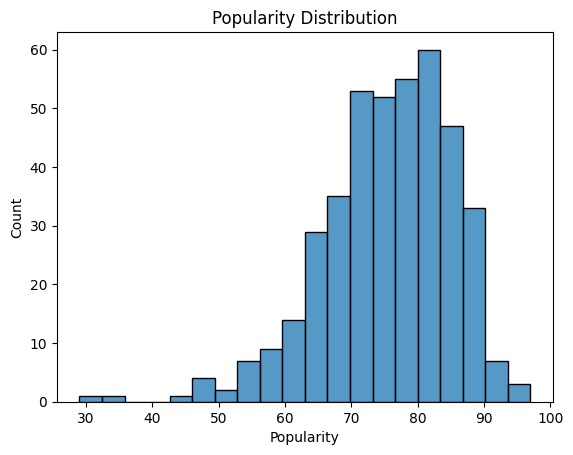

In [71]:
sns.histplot(df_sp['Popularity'], bins=20)
plt.title("Popularity Distribution")
plt.show()

**3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.**

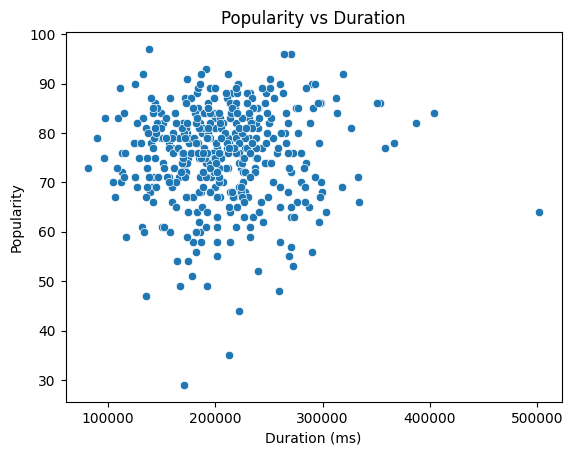

,Duration (ms),Popularity
Duration (ms),1.000000,0.038992
Popularity,0.038992,1.000000


In [72]:
sns.scatterplot(data=df_sp, x='Duration (ms)', y='Popularity')
plt.title("Popularity vs Duration")
plt.show()

df_sp[['Duration (ms)','Popularity']].corr()

**4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.**

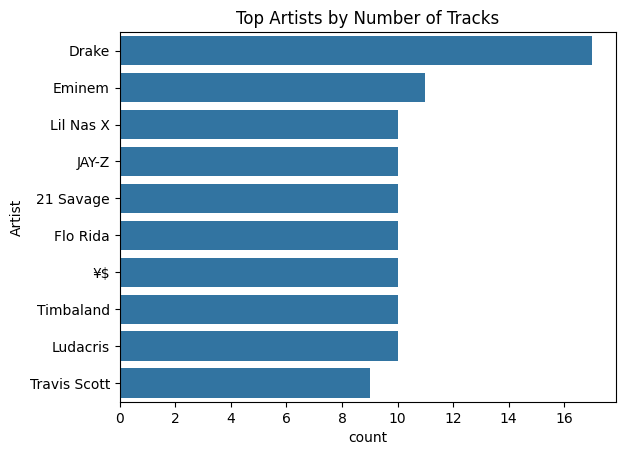

In [73]:
#Drake has the highest number of trakes in the dataset.
track_counts = df_sp['Artist'].value_counts()
track_counts.head(10)

sns.countplot(y='Artist', data=df_sp, order=df_sp['Artist'].value_counts().head(10).index)
plt.title("Top Artists by Number of Tracks")
plt.show()

**5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.**

In [74]:
#Pressa, Justin Bieber, French Montana, Lil Baby, Wyclef Jean are the top 5 least popular tracks in the dataset.
least_pop = df_sp.sort_values('Popularity').head(5)
least_pop[['Artist','Track Name','Popularity']]

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


**6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.**

In [76]:
artist_counts = df_sp['Artist'].value_counts()
top5_artists = artist_counts.head(5).index.tolist()

avg_pop = df_sp[df_sp['Artist'].isin(top5_artists)].groupby('Artist')['Popularity'].mean().round(2)
avg_pop

,Popularity
Artist,
21 Savage,83.80
Drake,82.88
Eminem,83.64
JAY-Z,77.90
Lil Nas X,75.90


**7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.**

In [77]:
result = df_sp[df_sp['Artist'].isin(top5_artists)].sort_values(['Artist','Popularity'], ascending=[True,False]).groupby('Artist').head(1)
result[['Artist','Track Name','Popularity']]

,Artist,Track Name,Popularity
70,21 Savage,redrum,96
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
100,JAY-Z,Ni**as In Paris,86
312,Lil Nas X,THATS WHAT I WANT,81


**8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.**

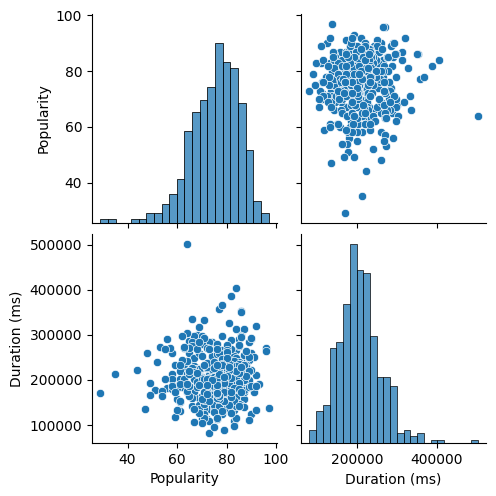

In [78]:
sns.pairplot(df_sp[['Popularity','Duration (ms)']])
plt.show()

**9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.**

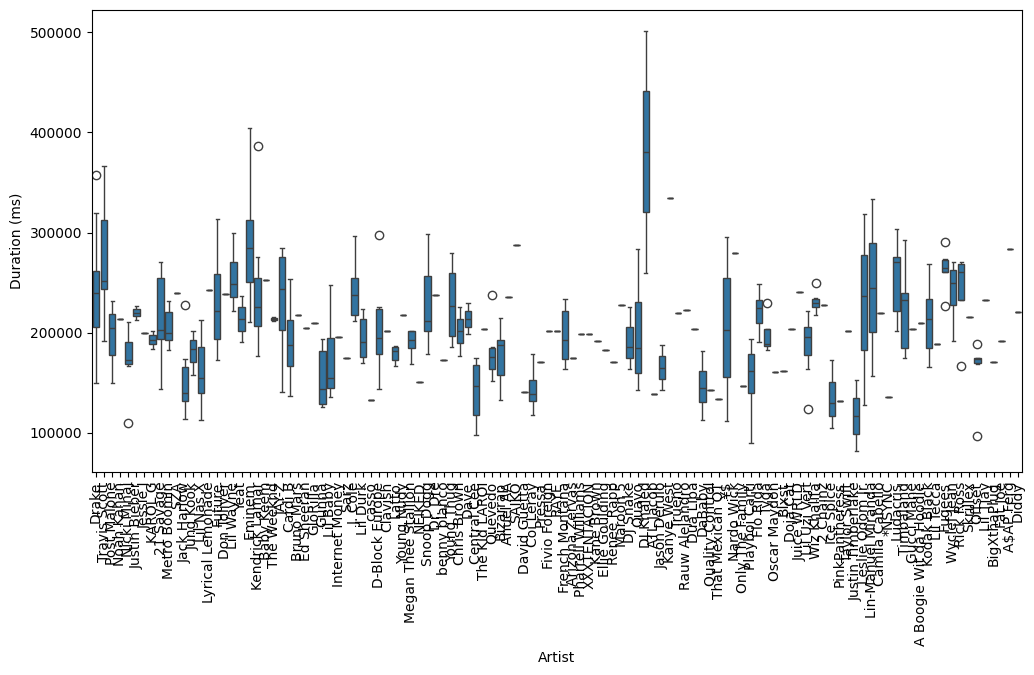

In [79]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_sp, x='Artist', y='Duration (ms)')
plt.xticks(rotation=90)
plt.show()

**10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.**

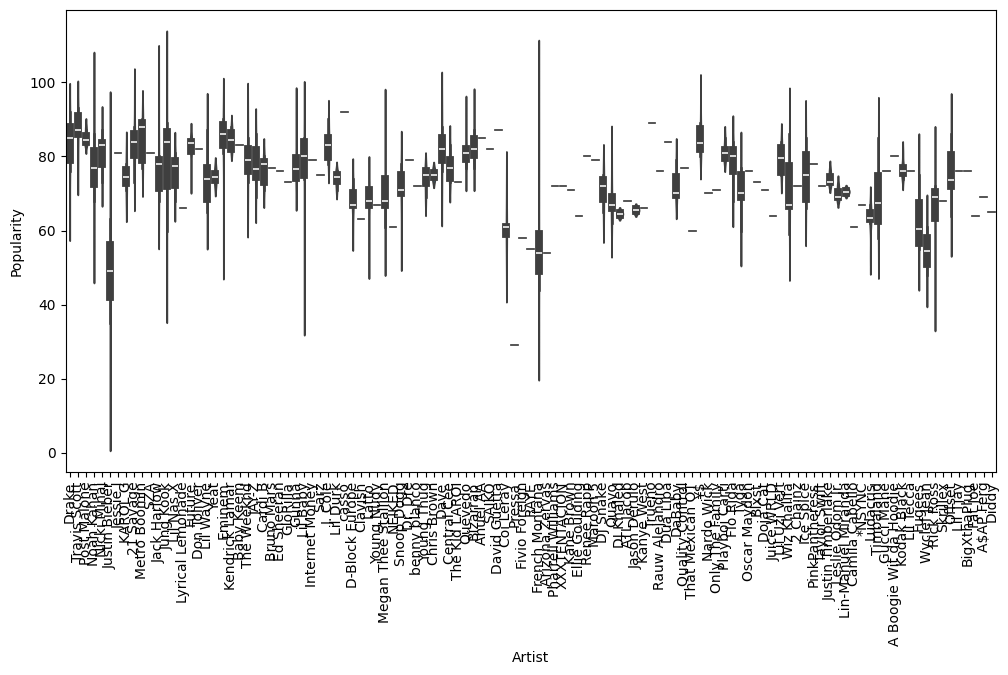

In [80]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df_sp, x='Artist', y='Popularity')
plt.xticks(rotation=90)
plt.show()